mean_amount= 15.282687173128268
g_test: Ttest_indResult(statistic=-1.8383584915578328, pvalue=0.06601289074424765)


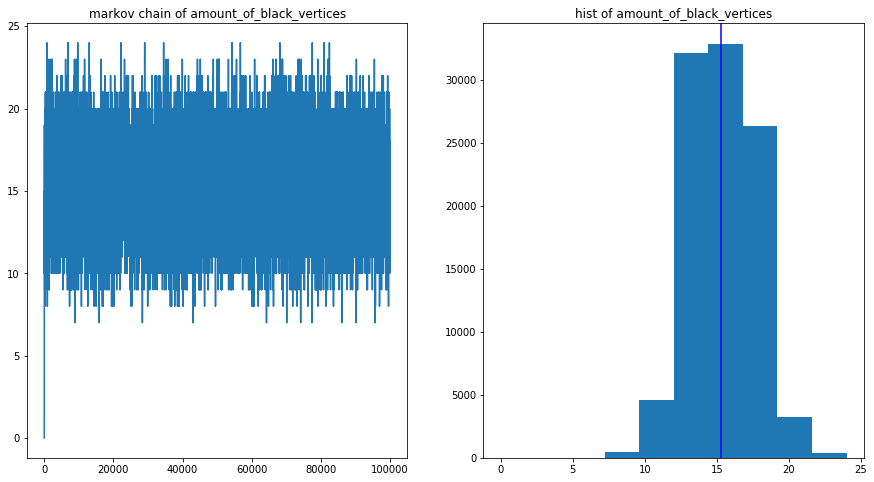

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def g_test(x, start=0.5, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

def plot_grid(mask):
    if mask.dtype != 'int':
        raise ValueError("mask should consist of int")
    mas_of_colors=np.empty(mask.shape,dtype='U5')
    mas_of_colors[:]='red'
    mas_of_colors[mask==1]='blue'
    print(mas_of_colors)
    x,y=np.indices((N,N))
    x=x.ravel()
    y=y.ravel()
    new_mas_of_colors=np.empty(mask.shape,dtype='U5')
    for i in range(N):
        new_mas_of_colors[i]=mas_of_colors[-1-i]
    new_mas_of_colors=new_mas_of_colors.ravel()
    for t in range(N*N):
        plt.scatter(y[t],x[t],color=new_mas_of_colors[t])
    plt.show()
    
def get_neighbours(i,j):
    otv=[]
    
    if ((0<= (i-1)<N) and (0<= j <N)):
        otv.append([i-1,j])
    if ((0<= (i+1)<N) and (0<= j <N)):
        otv.append([i+1,j])
    if ((0<= i <N) and (0<= (j-1) <N)):
        otv.append([i,j-1])
    if ((0<= i <N) and (0<= (j+1) <N)):
        otv.append([i,j+1])
    
    return otv
    
def check_if_vertice_can_be_changed(i,j,mask):
    if (mask[i,j]==1):
        return 1
    if (mask[i,j]==0):
        s=0
        mas=get_neighbours(i,j)
        for t in range(0,len(mas)):
            a,b=mas[t]
            s=s+mask[a,b]
            if s!=0:
                return 0
        return 1

def give_mas_of_good_neighbours(mask):
    otv=[]
    for i in range(N):
        for j in range(N):
            s=check_if_vertice_can_be_changed(i,j,mask)
            if(s==1):
                otv.append([i,j])
    return otv

def give_next(tek):
    mas_for_tek=give_mas_of_good_neighbours(tek)
    a,b=mas_for_tek[np.random.randint(len(mas_for_tek))]
    proposal=tek.copy()
    proposal[a][b]=(proposal[a][b]+1)%2
    mas_for_proposal=give_mas_of_good_neighbours(proposal)
    ratio=len(mas_for_tek)/len(mas_for_proposal)
    if (np.random.uniform()<ratio):
        return proposal
    else:
        return tek

def get_apost_distrib(start,NITER):
    tek=start.copy()
    otv=[start]
    #print(otv)
    for i in range(NITER):
        tek=give_next(tek)
        otv.append(tek.copy())
        #print(otv)
    return otv

def count_black_vertices(mask):
    s=0
    for i in range(N):
        for j in range(N):
            if (mask[i][j]==1):
                s=s+1
    return s

def get_amount_of_black_vertices(apost_distrib):
    otv=[]
    for i in range(len(apost_distrib)):
        otv.append(count_black_vertices(apost_distrib[i]))
    return otv

N=8
NITER=100000
NBURN=NITER//10
start=np.zeros(N*N).reshape(N,N)
#print(start)

apost_distrib=get_apost_distrib(start,NITER)
amount_of_black_vertices=get_amount_of_black_vertices(apost_distrib)

mean_amount=np.array(amount_of_black_vertices).mean()
print("mean_amount=",mean_amount)
print("g_test:",g_test(amount_of_black_vertices[NBURN:]))

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(amount_of_black_vertices)
plt.title("markov chain of amount_of_black_vertices")
plt.subplot(1,2,2)
plt.hist(amount_of_black_vertices)
plt.title("hist of amount_of_black_vertices")
plt.axvline(mean_amount,c='b')
plt.show()

            
